# Optimal Asset Mix
* How do we define the optimal mix of PSP and LHP for a given investor
    * In theory: decided by risk-aversiging parameter $\gamma$ (gamma) -has no real-world counterpart
        * Should be thought of as a free paramter
        * Can be quantified as a max drawdown, average/expected shortfall, p of a shorfall in a given timeframe
    * Asset owners will invest the largest amount possible given the risk budget
        * Risk budgets set by stakeholder or those agents acting on their behalf
        * There is a conflict between short-term and long-term perspectives
        
## Simulation of prices of coupon-bearing bonds using CIR

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from my_modules import risk
from my_modules import portfolio
from my_modules import model

import numpy as np
import pandas as pd

In [24]:
portfolio.bond_price(5, 100, .05, 12, .03)

0    109.275393
dtype: float64

In [40]:
rates, zc_prices = model.cir(10, 500, b=.03, r_0=.03)

In [26]:
portfolio.bond_price(5, 100, .05, 12, rates.iloc[0][[1,2,3]]) #At t=0 the interest is the same, price should be same

1    109.275393
2    109.275393
3    109.275393
dtype: float64

In [27]:
portfolio.bond_price(5, 100, .05, 12, rates.iloc[1][[1,2,3]]) # Start to diverge

1    108.883420
2    106.538689
3    110.173173
dtype: float64

In [28]:
rates[[1,2,3]].head()

,1,2,3
0,0.030000,0.030000,0.030000
1,0.030807,0.035701,0.028164
2,0.033575,0.032937,0.029958
3,0.030598,0.033772,0.033550
4,0.028781,0.033380,0.036455


In [29]:
portfolio.bond_price(5, 100, .05, 12, rates[[1,2,3,4,5]])

,1,2,3,4,5
0,109.275,109.275,109.275,109.275,109.275
1,108.746,106.439,110.015,109.857,108.105
2,107.319,107.614,109.008,110.682,106.151
3,108.568,107.113,107.214,110.649,105.433
4,109.255,107.173,105.804,109.057,105.051
...,...,...,...,...,...
116,100.417,100.417,100.417,100.417,100.417
117,100.417,100.417,100.417,100.417,100.417
118,100.417,100.417,100.417,100.417,100.417
119,100.417,100.417,100.417,100.417,100.417


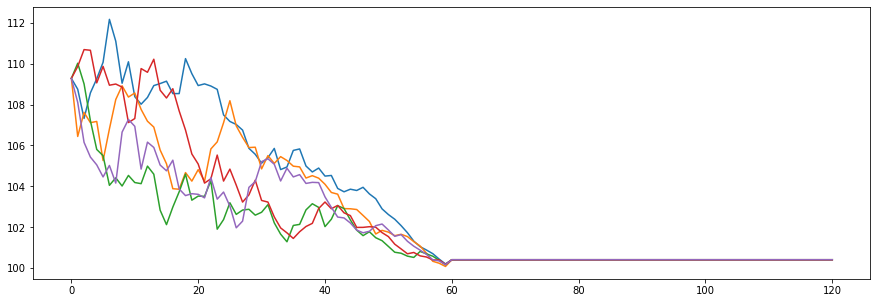

In [30]:
portfolio.bond_price(5, 100, .05, 12, rates[[1,2,3,4,5]]).plot(legend=False, figsize=(15,5))

In [31]:
prices = portfolio.bond_price(10, 100, .05, 12, rates[[1,2,3,4,5]])

In [32]:
# We want generate random bond prices, so that we can generate returns from bond prices
# Once we have returns for the bonds then we can predict the returns of a bond protfolio 
# and use it in combination with our stock portfolio scenarios

br = prices.pct_change().dropna()
risk.annualise_rets(br, 12) # Only the price returns

1   -0.015387
2   -0.015387
3   -0.015387
4   -0.015387
5   -0.015387
dtype: float64

In [33]:
p = portfolio.bond_price(10, 100, .05, 12, rates[[1,2,3,4]])
btr = portfolio.bond_total_return(p, 100, 0.05, 12)
risk.annualise_rets(btr)

1    0.029850
2    0.030806
3    0.031856
4    0.031076
dtype: float64

The intermediate payments are affected by the interest rate at the time of paying 'you don't know what you're going to get'

In [42]:
price_10 = portfolio.bond_price(10, 100, .05, 12, rates) # 500 scenarios, should run on 5000+

In [43]:
price_10[[1,2,3]].tail()

,1,2,3
116,99.6786,101.454,101.254
117,99.9454,101.123,100.955
118,100.034,100.752,100.687
119,100.029,100.378,100.346
120,100.417,100.417,100.417


In [44]:
price_30 = portfolio.bond_price(30, 100, .05, 12, rates)
price_30[[1,2,3]].tail()

,1,2,3
116,88.5247,183.304,167.863
117,97.2519,186.55,168.961
118,102.619,186.709,176.306
119,104.584,187.123,176.737
120,107.825,181.06,170.354


In [45]:
# For the 30 year the price is all over the place... bonds aren't safe

In [46]:
rets_10 = portfolio.bond_total_return(price_10, 100, 0.05, 12)
rets_30 = portfolio.bond_total_return(price_30, 100, 0.05, 12)
rets_bonds = .6*rets_10 * .4*rets_30 #Monthly rebalancing


In [47]:
mean_rets_bonds = rets_bonds.mean(axis='columns')
portfolio.summary_stats(pd.DataFrame(mean_rets_bonds))

,Annualised Return,Annulised Volatility,Max Drawdown,Skew,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Annualised Sharpe Ration
0,0.001305,0.000224,0.0,0.192551,1.995227,-0.000005,-0.000008,-124.950201


In [52]:
price_equities = model.gbm(n_scenarios=500)

In [55]:
rets_equities = price_equities.pct_change().dropna()
rets_equities.shape

(120, 500)

In [57]:
rets = .7*rets_equities + .3*rets_bonds
# Not perfect
rets_mean = rets.mean(axis='columns')
portfolio.summary_stats(pd.DataFrame(rets_mean)

SyntaxError: unexpected EOF while parsing (<ipython-input-57-b1261f5aa447>, line 4)